# Week5 Crawling Assignment

* 네이버 증권 [국내증시 시가총액 페이지](https://finance.naver.com/sise/sise_market_sum.nhn)에 있는 기업 리스트를 읽어옵니다. 
    이 리스트에서 크게 1) 기업명, 2) 링크를 읽어오면 됩니다.
* 위의 2) 링크를 통해 기업의 상세 컨텐츠에 접근할 수 있으며, 이 상세 컨텐츠의 투자정보를 읽어오면 됩니다.

In [1]:
import requests
from bs4 import BeautifulSoup

## 1. 기업 리스트 수집

**실습 1. get_finance_list() 작성**
- Case1-2까지의 코드

In [2]:
def get_finance_list(html):
    
    soup = BeautifulSoup(html) # parameter로 입력받은 주소의 html을 파싱한다.
    
    elements = soup.select('.box_type_l tbody tr') # 특정 css선택자로 파싱
    
    finance_list = []
    for element in elements:
        link_element = element.select_one('a') # <a class="tltle" href="/item/main.nhn?code=000001"></a>
        
        if link_element: # element 가 있을 경우
            
            element_parse = {}
            element_parse['title'] = link_element.text
            element_parse['url'] = "https://finance.naver.com" + link_element.get('href')
            
            finance_list.append(element_parse) # list에 추가
        
    return finance_list

### Unit Tests

**Case 1-1** - 시가총액 페이지에 아무런 기업이 없을 경우

In [3]:
html = """
<div class="box_type_l">
    <table>
        <tbody>
        </tbody>
    </table>
</div>
"""

finance_list = get_finance_list(html)

assert len(finance_list) == 0

**Case 1-2** - 시가총액 페이지에 기업이 한 개 있을 경우

In [4]:
html = """
<div class="box_type_l">
    <table>
        <tbody>
            <tr>
            </tr>
            <tr>
                <td>
                    <a href="/item/main.nhn?code=000001" class="tltle"></a>
                </td>
            </tr>
        </tbody>
    </table>
</div>
"""

finance_list = get_finance_list(html)

assert len(finance_list) == 1

**Case 1-3** - 시가총액 페이지에 기업이 두 개 있을 경우

In [5]:
html = """
<div class="box_type_l">
    <table>
        <tbody>
            <tr>
            </tr>
            <tr>
                <td>
                    <a href="/item/main.nhn?code=000001" class="tltle"></a>
                </td>
            </tr>
            <tr>
                <td>
                    <a href="/item/main.nhn?code=000002" class="tltle"></a>
                </td>
            </tr>
        </tbody>
    </table>
</div>
"""

finance_list = get_finance_list(html)

assert len(finance_list) == 2

**Case 1-4** - 한 개의 기업이 있는 시가총액 페이지 에서 기업 이름을 가져오기

In [6]:
html = """
<div class="box_type_l">
    <table>
        <tbody>
            <tr>
            </tr>
            <tr>
                <td>
                    <a href="/item/main.nhn?code=000001" class="tltle">첫 번째 기업</a>
                </td>
            </tr>
        </tbody>
    </table>
</div>
"""

finance_list = get_finance_list(html)

assert len(finance_list) == 1

first_finance = finance_list[0]

assert first_finance['title'] == "첫 번째 기업"

**Case 1-5** - 한 개의 기업이 있는 시가총액 페이지 에서 기업 이름과 링크를 가져오기

In [7]:
html = """
<div class="box_type_l">
    <table>
        <tbody>
            <tr>
            </tr>
            <tr>
                <td>
                    <a href="/item/main1.nhn" class="tltle">첫 번째 기업</a>
                </td>
            </tr>
        </tbody>
    </table>
</div>
"""

finance_list = get_finance_list(html)
 
assert len(finance_list) == 1

first_finance = finance_list[0]

assert first_finance['title'] == "첫 번째 기업"
assert first_finance['url'] == "https://finance.naver.com/item/main1.nhn"

**Case 1-6** - 두 개의 기업이 있는 시가총액 페이지 에서 기업 이름과 링크를 가져오기

In [8]:
html = """
<div class="box_type_l">
    <table>
        <tbody>
            <tr>
            </tr>
            <tr>
                <td>
                    <a href="/item/main1.nhn" class="tltle">첫 번째 기업</a>
                </td>
            </tr>
            <tr>
                <td>
                    <a href="/item/main2.nhn" class="tltle">두 번째 기업</a>
                </td>
            </tr>
        </tbody>
    </table>
</div>
"""

finance_list = get_finance_list(html)

assert len(finance_list) == 2

first_finance = finance_list[0]

assert first_finance['title'] == "첫 번째 기업"
assert first_finance['url'] == "https://finance.naver.com/item/main1.nhn"

first_finance = finance_list[1]

assert first_finance['title'] == "두 번째 기업"
assert first_finance['url'] == "https://finance.naver.com/item/main2.nhn"

**Case 1-7** - 실제 네이버 증권 시가총액 한 페이지를 크롤링하기

아래 코드를 실행시켜 다음과 같이 결과가 잘 출력되는지 확인해주세요.  
결과가 잘 출력되지 않는다면 get_finance_list()를 수정해야 합니다!
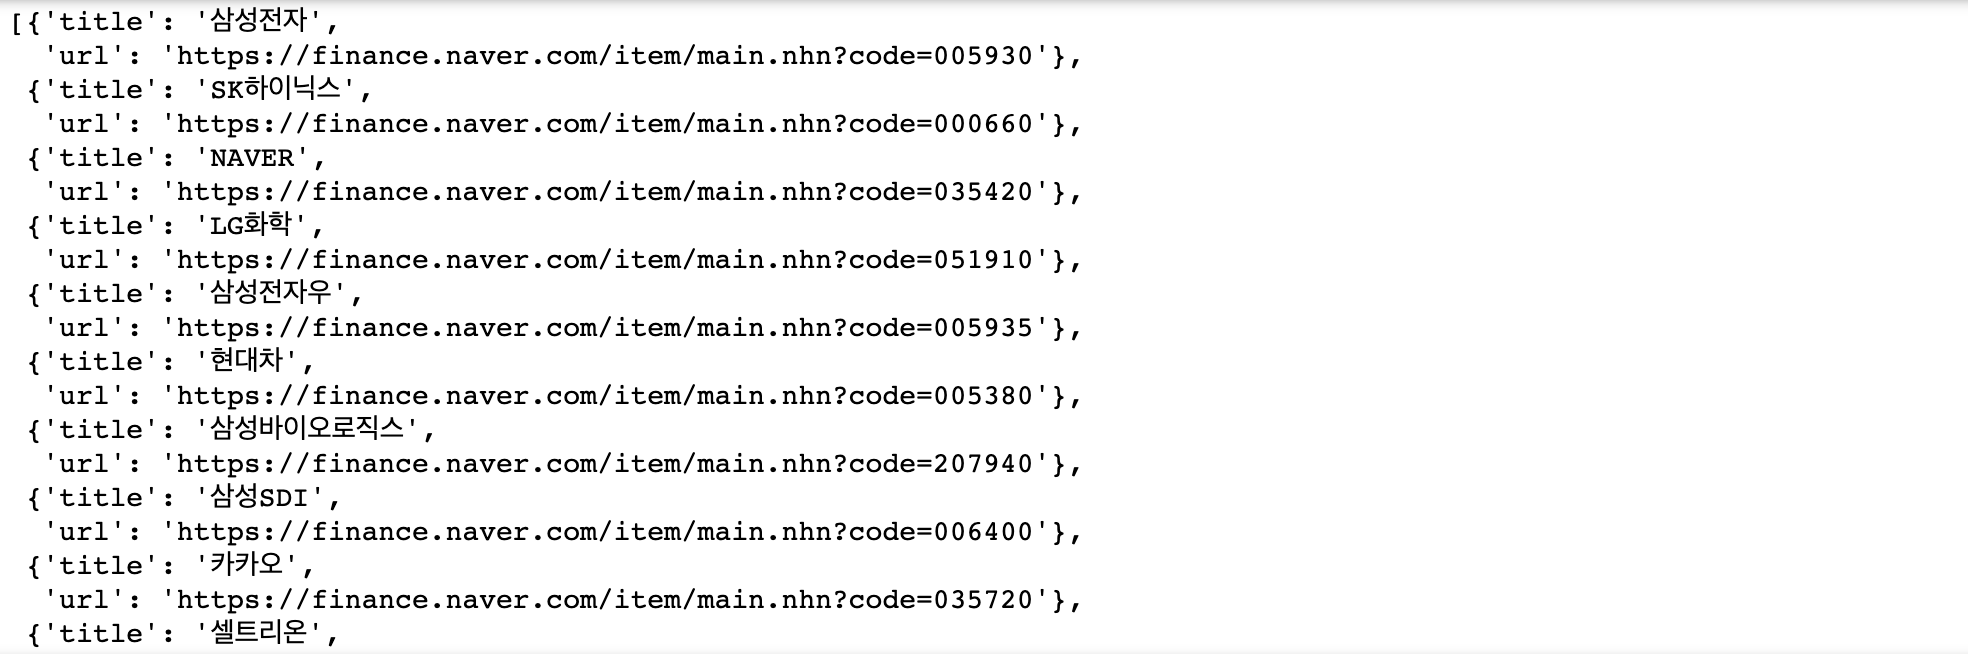

In [32]:
# finance_list_url에 네이버 증권 url을 저장합니다.
finance_list_url = "https://finance.naver.com/sise/sise_market_sum.nhn?&page=1"

# 위 URL로 접속한다음 그 응답 결과를 가져옵니다. 이를 response라는 이름의 변수에 할당합니다.
response = requests.get(finance_list_url)

# 국내증시 시가총액 페이지에서 기업 리스트를 읽어옵니다.
finance_list = get_finance_list(response.content)

# 이 기업 리스트를 전부 출력합니다.
finance_list

[{'title': '삼성전자',
  'url': 'https://finance.naver.com/item/main.nhn?code=005930'},
 {'title': 'SK하이닉스',
  'url': 'https://finance.naver.com/item/main.nhn?code=000660'},
 {'title': 'NAVER',
  'url': 'https://finance.naver.com/item/main.nhn?code=035420'},
 {'title': '삼성전자우',
  'url': 'https://finance.naver.com/item/main.nhn?code=005935'},
 {'title': 'LG화학',
  'url': 'https://finance.naver.com/item/main.nhn?code=051910'},
 {'title': '현대차',
  'url': 'https://finance.naver.com/item/main.nhn?code=005380'},
 {'title': '삼성바이오로직스',
  'url': 'https://finance.naver.com/item/main.nhn?code=207940'},
 {'title': '삼성SDI',
  'url': 'https://finance.naver.com/item/main.nhn?code=006400'},
 {'title': '카카오',
  'url': 'https://finance.naver.com/item/main.nhn?code=035720'},
 {'title': '셀트리온',
  'url': 'https://finance.naver.com/item/main.nhn?code=068270'},
 {'title': '기아차',
  'url': 'https://finance.naver.com/item/main.nhn?code=000270'},
 {'title': '현대모비스',
  'url': 'https://finance.naver.com/item/main.nhn?

**실습2. get_all_finance_list() 작성**

**Case 1-8** - 실제 네이버 증권 시가총액 전체 페이지를 크롤링하기

약 1500가량의 모드 회사의 기업 이름과, 링크가 잘 가져와지도록 get_all_finance_list()를 구현해보세요.  
(시간이 조금 걸릴 수 있습니다)

In [20]:
def get_all_finance_list():
    finance_list = []
    
    base_url = "https://finance.naver.com/sise/sise_market_sum.nhn?&page=" # page 부분을 뗀 url
    
    # 전체 페이지가 32다.
    for i in range(1, 33): # 1 ~ 32 까지 반복
        parse_url = base_url + str(i)
        response = requests.get(parse_url)
        
        finance_list += get_finance_list(response.content)
    
    return finance_list
    
all_finanace_list = get_all_finance_list()
all_finanace_list

[{'title': '삼성전자',
  'url': 'https://finance.naver.com/item/main.nhn?code=005930'},
 {'title': 'SK하이닉스',
  'url': 'https://finance.naver.com/item/main.nhn?code=000660'},
 {'title': 'LG화학',
  'url': 'https://finance.naver.com/item/main.nhn?code=051910'},
 {'title': 'NAVER',
  'url': 'https://finance.naver.com/item/main.nhn?code=035420'},
 {'title': '삼성전자우',
  'url': 'https://finance.naver.com/item/main.nhn?code=005935'},
 {'title': '현대차',
  'url': 'https://finance.naver.com/item/main.nhn?code=005380'},
 {'title': '삼성바이오로직스',
  'url': 'https://finance.naver.com/item/main.nhn?code=207940'},
 {'title': '삼성SDI',
  'url': 'https://finance.naver.com/item/main.nhn?code=006400'},
 {'title': '카카오',
  'url': 'https://finance.naver.com/item/main.nhn?code=035720'},
 {'title': '셀트리온',
  'url': 'https://finance.naver.com/item/main.nhn?code=068270'},
 {'title': '기아차',
  'url': 'https://finance.naver.com/item/main.nhn?code=000270'},
 {'title': '현대모비스',
  'url': 'https://finance.naver.com/item/main.nhn?

In [37]:
len(all_finanace_list)

1578

## 2. 기업 상세 정보 수집

## - 주가 정보

- 주가
- 시가
- 시가총액
- 시가총액순위

**실습 3. get_finance_detail() 작성**

In [9]:
def get_finance_detail(html):
    
    finance = {} # return 데이터 생성
    
    soup = BeautifulSoup(html)
    
    # --------- 주가 검색 ----------------- #
    elements = soup.select_one('div.rate_info .no_today .blind') # rate_info 클래스의 div 안의 no_today 클래스의 div
    if elements: # 주가가 존재하면
        finance['value'] = int(elements.text.strip(' \t\n').replace(',', '')) # 공백 문자와 , 제거 후 정수로 변환
    else:
        finance['value'] = None
        
    
    # --------- 시가 검색 ----------------- #
    elements = soup.select('div.rate_info table td.first') # 시가 검색을 위해 테이블 등록
    target1 = None # 판정을 위한 초기화
    
    
    for e in elements: # 테이블이 여러개일 수 있으므로 반복으로 '시가' 를 찾습니다.
        if '시가\n' in e.text.strip(): # 오류 방지를 위해 \n 추가
            target1 = e.parent # 시가가 있는 태그의 부모 태그 저장
            break
        
    if target1:
        finance['open_value'] = int(target1.select_one('span.blind').text.strip(' \t\n').replace(',', '')) # 숫자에서 공백과 , 제거 후 정수로 저장
    else:
        finance['open_value'] = None # 없는 경우 저장하지 않음

        
    # --------- 시가총액 검색 ----------------- #
    # 위와 코드가 같다.
    elements = soup.select('div#tab_con1 div table tr th') # 시가 검색을 위해 테이블 등록
    target2 = None

    for e in elements: # 테이블이 여러개일 수 있으므로 반복으로 '시가 총액' 를 찾습니다.
        if '시가총액' == e.text.strip():
            target2 = e.parent # 시가총액이 있는 태그의 부모 태그 저장
            break
            
    if target2: # 시가총액이 존재하면
        finance['market_cap(억원)'] = int(target2.select_one('em#_market_sum').text.translate(str.maketrans({'\n': "", '\t': "", '조':"", ' ':'', ',': ''}))) # 공백과 "조", , 제거 후 
    else:
        finance['market_cap(억원)'] = None # 없는 경우 저장하지 않음
        
    
    # --------- 시가총액 순위 검색 ----------------- #
    # 위와 코드가 같다.
    elements = soup.select('div#tab_con1 div table tr th a') # 시가 검색을 위해 테이블 등록
    target3 = None

    for e in elements: # 테이블이 여러개일 수 있으므로 반복으로 '시가 총액 순위' 를 찾습니다.
        if '시가총액순위' == e.text.strip():
            target3 = e.parent.parent # 시가총액 순위가 있는 태그의 부모 태그 (2단계 up) 저장
            break
            
    if target3:
        finance['market_cap_rank'] = target3.select_one('td').text.translate(str.maketrans({'\n': "", '\t': "", ' ':'', ',': ''})) # 공백과 "조", , 제거 후 
    else:
        finance['market_cap_rank'] = None # 없는 경우 저장하지 않음
        
    
    return finance

### Unit Tests


**Case 2-1** - 기업정보 페이지에 아무런 내용이 없을 경우

In [10]:
html = """
<div class="rate_info">
</div>
<div class="tab_con1">
</div>
"""

finance = get_finance_detail(html)

assert finance['value'] == None

**Case 2-2** - 기업정보 페이지에서 주가 가져오기

In [11]:
html = """
<div class="rate_info">
    <div class="no_today">
        <div class="blind">
            82,000
        </div>
    </div>
</div>
<div class="tab_con1">
</div>
"""

finance = get_finance_detail(html)

assert finance['value'] == 82000

**Case 2-3** - 기업정보 페이지에서 시가를 추가로 가져오기

`<div class="rate_info">`에서 "시가"라는 단어를 찾고 html 태그간의 부모-자식 관계를 이용하여 찾아보세요.

In [12]:
html = """
<div class="rate_info">
    <div class="no_today">
        <div class="blind">
            82,000
        </div>
    </div>
    <table class="no_info">
        <tr>
            <td class="first">
                <span class="sptxt sp_txt3">시가</span>
                            <em class="no_up">

                    <span class="blind">81,200</span>
                    <span class="no8">8</span>
                    <span class="no1">1</span>
                    <span class="shim">,</span>
                    <span class="no2">2</span>
                    <span class="no0">0</span>
                    <span class="no0">0</span>

                </em>
            </td>
        </tr>
    </table>
</div>
<div class="tab_con1">
</div>
"""

finance = get_finance_detail(html)

assert finance['value'] == 82000

assert finance['open_value'] == 81200

**Case 2-4** - 기업정보 페이지에서 시가총액을 추가로 가져오기

`<div id="tab_con1" class="tab_con1">`에서 "시가총액"이라는 단어를 찾고 html 태그간의 부모-자식 관계를 이용하여 찾아보세요.

In [13]:
html = """
<div class="rate_info">
</div>
<div id="tab_con1" class="tab_con1">
    <div>
        <table>
            <caption>시가총액</caption>
            <tr class="strong">
                <th scope="row">시가총액</th>
                <td><em id="_market_sum">
                            320조
                                5,773
                    </em>억원
                </td>
            </tr>
        </table>
    </div>
</div>
"""

finance = get_finance_detail(html)

assert finance['market_cap(억원)'] == 3205773

**Case 2-5-1** - 기업정보 페이지에서 시가총액순위를 추가로 가져오기

`<div id="tab_con1" class="tab_con1">`에서 "시가총액순위"라는 단어를 찾고 html 태그간의 부모-자식 관계를 이용하여 찾아보세요.

In [14]:
html = """
<div class="rate_info">
</div>
<div id="tab_con1" class="tab_con1">
    <div>
        <table>
            <tr>
                <th scope="row">
                    <a class="link_site" href="/sise/sise_market_sum.nhn">시가총액순위</a>
                </th>
                <td>
                    코스피 <em>1</em>위
                </td>
            </tr>
        </table>
    </div>
</div>
"""

finance = get_finance_detail(html)

assert finance['market_cap_rank'] == '코스피1위'

**Case 2-5-2** - 기업정보 페이지에 시가총액순위가 없는 경우

In [15]:
html = """
<div class="rate_info">
</div>
<div id="tab_con1" class="tab_con1">
    <div>
        <table>
            <tr>
            </tr>
        </table>
    </div>
</div>
"""

finance = get_finance_detail(html)

assert finance['market_cap_rank'] == None

**Case 2-6** - 실제 네이버 증권 상세 페이지를 크롤링하기

아래 코드를 실행시켜 다음과 같이 결과가 잘 출력되는지 확인해주세요.  
결과가 잘 출력되지 않는다면 get_finance_detail()를 수정해야 합니다!
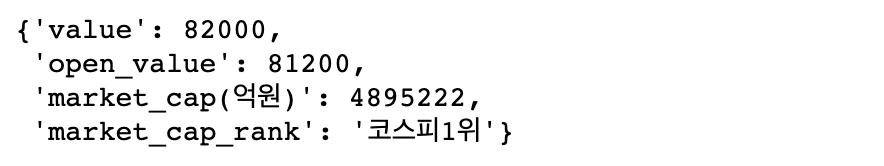

In [19]:
def get_all_finance_detail(response):
    
    finance_detail = get_finance_detail(response.content)
    
    finance = {
        'value' : finance_detail['value'],
        'open_value' : finance_detail['open_value'],
        'market_cap(억원)': finance_detail['market_cap(억원)'],
        'market_cap_rank': finance_detail['market_cap_rank'],
    }

    return finance

In [17]:
finance_url = "https://finance.naver.com/item/main.nhn?code=005930"

response = requests.get(finance_url)

finance = get_all_finance_detail(response)

finance

{'value': 83600,
 'open_value': 85100,
 'market_cap(억원)': 499738,
 'market_cap_rank': '코스피1위'}

### 3. 전체 페이지 읽어오기

**실습 4. 모든 기업리스트에 대한 상세 정보 crawling**  
finance_summary_list 안에 있는 모든 기업 정보를 가져와 finanace_list에 담도록 구현합니다.

In [21]:
# get_all_finance_list함수를 활용하여 전체페이지에서 기업 요약정보(기업이름, url)를 받아옵니다.
finance_summary_list = get_all_finance_list()
    
finance_list = []

#######################################################
# finance_summary_list 안에 있는 모든 기업 정보를 가져와 finanace_list에 담도록 구현합니다.

for fin in finance_summary_list: # 기업 단위로 반복
    response = requests.get(fin["url"]) # html을 가져옴
    
    target_fin = get_all_finance_detail(response) # 기업 정보를 가져옴
    target_fin['title'] = fin['title'] # 기업의 이름을 추가함

    finance_list.append(target_fin) # 가져온 기업 주가 정보를 배열에 추가

#######################################################

finance_list

[{'value': 83600,
  'open_value': 85100,
  'market_cap(억원)': 499738,
  'market_cap_rank': '코스피1위',
  'title': '삼성전자'},
 {'value': 144500,
  'open_value': 149000,
  'market_cap(억원)': 1051963,
  'market_cap_rank': '코스피2위',
  'title': 'SK하이닉스'},
 {'value': 891000,
  'open_value': 863000,
  'market_cap(억원)': 628978,
  'market_cap_rank': '코스피3위',
  'title': 'LG화학'},
 {'value': 377500,
  'open_value': 389000,
  'market_cap(억원)': 6294,
  'market_cap_rank': '코스피4위',
  'title': 'NAVER'},
 {'value': 73100,
  'open_value': 74200,
  'market_cap(억원)': 601530,
  'market_cap_rank': '코스피5위',
  'title': '삼성전자우'},
 {'value': 239000,
  'open_value': 244500,
  'market_cap(억원)': 51667,
  'market_cap_rank': '코스피6위',
  'title': '현대차'},
 {'value': 753000,
  'open_value': 757000,
  'market_cap(억원)': 498222,
  'market_cap_rank': '코스피7위',
  'title': '삼성바이오로직스'},
 {'value': 684000,
  'open_value': 696000,
  'market_cap(억원)': 47349,
  'market_cap_rank': '코스피8위',
  'title': '삼성SDI'},
 {'value': 491500,
  'open_valu

### 4. CSV로 저장하기

In [22]:
import pandas as pd

finance_list_df = pd.DataFrame(finance_list)

finance_list_df

,value,open_value,market_cap(억원),market_cap_rank,title
0,83600,85100,499738,코스피1위,삼성전자
1,144500,149000,1051963,코스피2위,SK하이닉스
2,891000,863000,628978,코스피3위,LG화학
3,377500,389000,6294,코스피4위,NAVER
4,73100,74200,601530,코스피5위,삼성전자우
...,...,...,...,...,...
1569,8620,8840,22,None,KBSTAR 200중공업
1570,10955,11180,20,None,KBSTAR 200건설
1571,7605,7705,18,None,KBSTAR 200철강소재
1572,790,775,16,None,QV 인버스 레버리지 WTI원유 선물 ETN(H)


In [23]:
finance_list_df.to_csv("finance_Tue.csv")

## 셀레니움 사용해서 크롤링해보기
수업때 다룬 내용 중 하나인 셀레니움을 사용해서 크롤링을 시도해 보았다.

`Selenium` 은 웹 브라우저 자동화를 위한 프로젝트이다.

이를 이용하여 마우스 클릭이 필요한 페이지 등을 크롤링 해 올 수 있다.

Selenium을 이용하여 기관, 외국인 매매량과, 종목토론실의 글 등을 크롤링 해 올 수 있다.

In [14]:
from selenium import webdriver
import time

In [ ]:
finance_summary_list = get_all_finance_list()

In [60]:
finance_list = []
with webdriver.Chrome('./chromedriver') as driver:
    for fin in finance_summary_list: # 기업 단위로 반복

        target_fin = {} # 빈 딕셔너리 생성
        target_fin['title'] = fin['title'] # 기업의 이름을 추가함

        driver.get(fin["url"])
        driver.find_element_by_xpath('//*[@id="content"]/ul/li[4]/a').click() # 투자자별 매매동향 버튼 클릭
        time.sleep(1)
        html = driver.page_source
        soup = BeautifulSoup(html, 'html.parser')
        company = int(soup.select_one('div.section.inner_sub  table.type2 tbody tr:nth-child(4) td:nth-child(6)').text.strip(' \t\n').replace(',', ''))
        foregin = int(soup.select_one('div.section.inner_sub  table.type2 tbody tr:nth-child(4) td:nth-child(7)').text.strip(' \t\n').replace(',', ''))
    
        target_fin['company'] = company
        target_fin['foregin'] = foregin

    
        driver.find_element_by_xpath('//*[@id="content"]/ul/li[7]/a').click() # 종목토론 버튼 클릭
        time.sleep(1)
        html = driver.page_source
        soup = BeautifulSoup(html, 'html.parser')
        repls = soup.select('#content div.section.inner_sub table.type2 tbody tr td.title a') # 게시글들을 배열로 불러옴

        repl = []
        for r in repls: # 불러온 총 게시글을 반복하여 띄어쓰기를 제거하고 저장
            repl.append(r.text.translate(str.maketrans({'\n': "", '\t': "", ' ':'', ',': ''})))

        target_fin['repl'] = repl
        
        finance_list.append(target_fin) # 가져온 기업 주가 정보를 배열에 추가

2021년 3월 1일 오후 11시 47분에 수집한 데이터.

추가적인 정보로 회사의 이름, 기관 매매, 외국인 매매, 종목토론방의 게시글을 수집했다.

각 데이터의 수집 이유는 다음과 같았다.

- 기관 매매와 외국인 매매 동향은 한국의 코스피 지수에 중요한 역할을 한다고 생각했다.
- 종목토론방은 투자자들이 각 종목에 대해 이야기하는 게시판의 개념으로서, 현재 종목에 대한 사람들의 여론을 대략적으로 파악할 수 있을 것이라고 생각했다.

In [62]:
import pandas as pd
# 수집한 데이터 저장
other_data_df = pd.DataFrame(finance_list)

other_data_df

,title,company,foregin,repl
0,삼성전자,-3327093,-10726449,"[이재용님특사로나오실줄알고, 내일떡락할수도있다, 전기차모터사라오른다., 내일외인들이..."
1,SK하이닉스,-637625,-2588861,"[[SK하이닉스]SK하이닉스마케터는뭔..., 형님들[2], 특보요!, 비대면주주가?..."
2,NAVER,-114098,-104883,[]
3,삼성전자우,-52813,-837596,"[고공행진은비대면주그러나실적최고인..., 삼성전자우매수방법알려드립니다.-Y..., ..."
4,LG화학,-82492,-157824,"[""네가왜, 자잘보셔유..., 비대면주주가?고공행진자세히보시면..., 엘화폭망......"
...,...,...,...,...
1569,KBSTAR 200중공업,-722,0,[]
1570,동양3우B,0,0,[]
1571,KBSTAR 200건설,-212,0,[긴장마홍수피해]
1572,QV 인버스 레버리지 WTI원유 선물 ETN(H),11493,0,[]


In [64]:
other_data_df.to_csv("other_data.csv")

## 데이터 병합 후 정리

과제로 사용되는 finance_data의 경우는 휴장이 아닌 3영업일 (2월 25일, 2월 26일, 3월 2일) 동안 나눠서 수집했고,
other_data 의 경우는 3월 1일자로 수집했다.

이 데이터들을 하나의 테이블로 병합하겠다.

In [44]:
# 데이터 불러오기
finance_Tue = pd.read_csv("finance_Tue.csv", index_col=0).add_prefix('Tue_')
finance_Fri = pd.read_csv("finance_Fri.csv", index_col=0).add_prefix('Fri_')
finance_Thu = pd.read_csv("finance_Thu.csv", index_col=0).add_prefix('Thu_')
other_data = pd.read_csv("other_data.csv", index_col=0)

In [42]:
finance_Tue.head(3)

,Tue_value,Tue_open_value,Tue_market_cap(억원),Tue_market_cap_rank,Tue_title
0,83600,85100,499738,코스피1위,삼성전자
1,144500,149000,1051963,코스피2위,SK하이닉스
2,891000,863000,628978,코스피3위,LG화학


In [46]:
finance_Fri.head(3)

,Fri_value,Fri_open_value,Fri_market_cap(억원),Fri_market_cap_rank,Fri_title
0,82500,82800,4925071,코스피1위,삼성전자
1,141500,143500,103123,코스피2위,SK하이닉스
2,375000,372000,615988,코스피3위,NAVER


In [45]:
finance_Thu.head(3)

,Thu_value,Thu_open_value,Thu_market_cap(억원),Thu_market_cap_rank,Thu_title
0,85300,84000,5092225,코스피1위,삼성전자
1,148500,141000,1081084,코스피2위,SK하이닉스
2,383000,380500,629129,코스피3위,NAVER


In [88]:
other_data.head(3)

,title,company,foregin,repl
0,삼성전자,-3327093,-10726449,"['이재용님특사로나오실줄알고', '내일떡락할수도있다', '전기차모터사라오른다.', ..."
1,SK하이닉스,-637625,-2588861,"['[SK하이닉스]SK하이닉스마케터는뭔...', '형님들[2]', '특보요!', '..."
2,NAVER,-114098,-104883,[]


각 데이터들에게는 `title` 이라는 공통된 행이 있으며, 같은 값이 들어 있다.

이 행을 기반으로 INNER_JOIN 하여, 테이블을 병합하려 한다.

In [47]:
merged_df = pd.merge(
    left = finance_Tue, # 왼쪽 테이블
    right = finance_Thu, # 오른쪽 테블
    how = 'inner', # INNER 조인 실시
    left_on = 'Tue_title', # 왼쪽 테이블의 기준 
    right_on = 'Thu_title' # 오른쪽 테이블의 기준
    )



merged_df.head()

,Tue_value,Tue_open_value,Tue_market_cap(억원),Tue_market_cap_rank,Tue_title,Thu_value,Thu_open_value,Thu_market_cap(억원),Thu_market_cap_rank,Thu_title
0,83600,85100,499738,코스피1위,삼성전자,85300,84000,5092225,코스피1위,삼성전자
1,144500,149000,1051963,코스피2위,SK하이닉스,148500,141000,1081084,코스피2위,SK하이닉스
2,891000,863000,628978,코스피3위,LG화학,890000,867000,628272,코스피4위,LG화학
3,377500,389000,6294,코스피4위,NAVER,383000,380500,629129,코스피3위,NAVER
4,73100,74200,601530,코스피5위,삼성전자우,74100,73900,609759,코스피5위,삼성전자우


In [48]:
merged_df2 = pd.merge(
    left = merged_df, # 왼쪽 테이블
    right = finance_Fri, # 오른쪽 테블
    how = 'inner', # INNER 조인 실시
    left_on = 'Thu_title', # 왼쪽 테이블의 기준 
    right_on = 'Fri_title' # 오른쪽 테이블의 기준
    )



merged_df.head()

,Tue_value,Tue_open_value,Tue_market_cap(억원),Tue_market_cap_rank,Tue_title,Thu_value,Thu_open_value,Thu_market_cap(억원),Thu_market_cap_rank,Thu_title
0,83600,85100,499738,코스피1위,삼성전자,85300,84000,5092225,코스피1위,삼성전자
1,144500,149000,1051963,코스피2위,SK하이닉스,148500,141000,1081084,코스피2위,SK하이닉스
2,891000,863000,628978,코스피3위,LG화학,890000,867000,628272,코스피4위,LG화학
3,377500,389000,6294,코스피4위,NAVER,383000,380500,629129,코스피3위,NAVER
4,73100,74200,601530,코스피5위,삼성전자우,74100,73900,609759,코스피5위,삼성전자우


In [49]:
merged_df3 = pd.merge(merged_df2, other_data, how='inner', left_on='Fri_title', right_on='title')

merged_df3.head()

,Tue_value,Tue_open_value,Tue_market_cap(억원),Tue_market_cap_rank,Tue_title,Thu_value,Thu_open_value,Thu_market_cap(억원),Thu_market_cap_rank,Thu_title,Fri_value,Fri_open_value,Fri_market_cap(억원),Fri_market_cap_rank,Fri_title,title,company,foregin,repl
0,83600,85100,499738,코스피1위,삼성전자,85300,84000,5092225,코스피1위,삼성전자,82500,82800,4925071,코스피1위,삼성전자,삼성전자,-3327093,-10726449,"['이재용님특사로나오실줄알고', '내일떡락할수도있다', '전기차모터사라오른다.', ..."
1,144500,149000,1051963,코스피2위,SK하이닉스,148500,141000,1081084,코스피2위,SK하이닉스,141500,143500,103123,코스피2위,SK하이닉스,SK하이닉스,-637625,-2588861,"['[SK하이닉스]SK하이닉스마케터는뭔...', '형님들[2]', '특보요!', '..."
2,891000,863000,628978,코스피3위,LG화학,890000,867000,628272,코스피4위,LG화학,831000,865000,586622,코스피5위,LG화학,LG화학,-82492,-157824,"['""네가왜', '자잘보셔유...', '비대면주주가?고공행진자세히보시면...', '..."
3,377500,389000,6294,코스피4위,NAVER,383000,380500,629129,코스피3위,NAVER,375000,372000,615988,코스피3위,NAVER,NAVER,-114098,-104883,[]
4,73100,74200,601530,코스피5위,삼성전자우,74100,73900,609759,코스피5위,삼성전자우,72800,72700,599062,코스피4위,삼성전자우,삼성전자우,-52813,-837596,"['고공행진은비대면주그러나실적최고인...', '삼성전자우매수방법알려드립니다.-Y....."


In [50]:
merged_df4 = merged_df2.drop(['Tue_title', 'Fri_title', 'Thu_title' ], axis=1)
merged_df4.head()

,Tue_value,Tue_open_value,Tue_market_cap(억원),Tue_market_cap_rank,Thu_value,Thu_open_value,Thu_market_cap(억원),Thu_market_cap_rank,Fri_value,Fri_open_value,Fri_market_cap(억원),Fri_market_cap_rank
0,83600,85100,499738,코스피1위,85300,84000,5092225,코스피1위,82500,82800,4925071,코스피1위
1,144500,149000,1051963,코스피2위,148500,141000,1081084,코스피2위,141500,143500,103123,코스피2위
2,891000,863000,628978,코스피3위,890000,867000,628272,코스피4위,831000,865000,586622,코스피5위
3,377500,389000,6294,코스피4위,383000,380500,629129,코스피3위,375000,372000,615988,코스피3위
4,73100,74200,601530,코스피5위,74100,73900,609759,코스피5위,72800,72700,599062,코스피4위


## Feature Engineering

며칠간 구했던 데이터를 바탕으로 추가적인 데이터를 구해보고자 한다.

- 시가총액 순위 변동량 (1거래일)
- 주가 변동량 (1거래일)
- 시가 변동량 (1거래일)
- 시가총액 변동량 (1거래일)

- 시가총액 순위 변동량 (2거래일)
- 주가 변동량 (2거래일)
- 시가 변동량 (2거래일)
- 시가총액 변동량 (2거래일)

In [52]:
# 기본 데이터로 복사
df = merged_df3.copy()

df['diff_value_ThuFri'] = df['Fri_value'] - df['Thu_value']
df['diff_open_value_ThuFri'] = df['Fri_open_value'] - df['Thu_open_value']
df['diff_market_cap_ThuFri'] = df['Fri_market_cap(억원)'] - df['Thu_market_cap(억원)']

df['diff_value_FriTue'] = df['Fri_value'] - df['Tue_value']
df['diff_open_value_FriTue'] = df['Fri_open_value'] - df['Tue_open_value']
df['diff_market_cap_FriTue'] = df['Fri_market_cap(억원)'] - df['Tue_market_cap(억원)']

df['diff_value_TueThu'] = df['Thu_value'] - df['Tue_value']
df['diff_open_value_TueThu'] = df['Thu_open_value'] - df['Tue_open_value']
df['diff_market_cap_TueThu'] = df['Thu_market_cap(억원)'] - df['Tue_market_cap(억원)']

In [53]:
# 시가총액 순위는 string 형식으로 되어 있다. 따라서 순위 부분만 따로 숫자로 변환하여 차이를 구했다.
change_func = (lambda x: int(x[3:-1]) if x.__class__ == str else x)
df['diff_market_cap_rank_ThuFri'] = df['Fri_market_cap_rank'].map(change_func) - df['Thu_market_cap_rank'].map(change_func)
df['diff_market_cap_rank_FriTue'] = df['Tue_market_cap_rank'].map(change_func) - df['Fri_market_cap_rank'].map(change_func)
df['diff_market_cap_rank_TueThu'] = df['Tue_market_cap_rank'].map(change_func) - df['Thu_market_cap_rank'].map(change_func)

In [54]:
df

,Tue_value,Tue_open_value,Tue_market_cap(억원),Tue_market_cap_rank,Tue_title,Thu_value,Thu_open_value,Thu_market_cap(억원),Thu_market_cap_rank,Thu_title,...,diff_market_cap_ThuFri,diff_value_FriTue,diff_open_value_FriTue,diff_market_cap_FriTue,diff_value_TueThu,diff_open_value_TueThu,diff_market_cap_TueThu,diff_market_cap_rank_ThuFri,diff_market_cap_rank_FriTue,diff_market_cap_rank_TueThu
0,83600,85100,499738,코스피1위,삼성전자,85300,84000,5092225,코스피1위,삼성전자,...,-167154,-1100,-2300,4425333,1700,-1100,4592487,0.0,0.0,0.0
1,144500,149000,1051963,코스피2위,SK하이닉스,148500,141000,1081084,코스피2위,SK하이닉스,...,-977961,-3000,-5500,-948840,4000,-8000,29121,0.0,0.0,0.0
2,891000,863000,628978,코스피3위,LG화학,890000,867000,628272,코스피4위,LG화학,...,-41650,-60000,2000,-42356,-1000,4000,-706,1.0,-2.0,-1.0
3,377500,389000,6294,코스피4위,NAVER,383000,380500,629129,코스피3위,NAVER,...,-13141,-2500,-17000,609694,5500,-8500,622835,0.0,1.0,1.0
4,73100,74200,601530,코스피5위,삼성전자우,74100,73900,609759,코스피5위,삼성전자우,...,-10697,-300,-1500,-2468,1000,-300,8229,-1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1568,8620,8840,22,NaN,KBSTAR 200중공업,8800,8625,48,NaN,KBSTAR 200중공업,...,-26,10,-360,0,180,-215,26,NaN,NaN,NaN
1569,10955,11180,20,NaN,KBSTAR 200건설,11350,11310,20,NaN,KBSTAR 200건설,...,0,65,-40,0,395,130,0,NaN,NaN,NaN
1570,7605,7705,18,NaN,KBSTAR 200철강소재,7735,7640,40,NaN,KBSTAR 200철강소재,...,-1,-35,-90,21,130,-65,22,NaN,NaN,NaN
1571,790,775,16,NaN,QV 인버스 레버리지 WTI원유 선물 ETN(H),715,715,14,NaN,QV 인버스 레버리지 WTI원유 선물 ETN(H),...,0,-65,-50,-2,-75,-60,-2,NaN,NaN,NaN


이와 같이 차이를 정리해 두면 다음과 같은 분석이 가능하다.

In [56]:
# 3 영업일 동안 시가총액이 상승한 기업
df[df['diff_market_cap_TueThu'] >= 0]

,Tue_value,Tue_open_value,Tue_market_cap(억원),Tue_market_cap_rank,Tue_title,Thu_value,Thu_open_value,Thu_market_cap(억원),Thu_market_cap_rank,Thu_title,...,diff_market_cap_ThuFri,diff_value_FriTue,diff_open_value_FriTue,diff_market_cap_FriTue,diff_value_TueThu,diff_open_value_TueThu,diff_market_cap_TueThu,diff_market_cap_rank_ThuFri,diff_market_cap_rank_FriTue,diff_market_cap_rank_TueThu
0,83600,85100,499738,코스피1위,삼성전자,85300,84000,5092225,코스피1위,삼성전자,...,-167154,-1100,-2300,4425333,1700,-1100,4592487,0.0,0.0,0.0
1,144500,149000,1051963,코스피2위,SK하이닉스,148500,141000,1081084,코스피2위,SK하이닉스,...,-977961,-3000,-5500,-948840,4000,-8000,29121,0.0,0.0,0.0
3,377500,389000,6294,코스피4위,NAVER,383000,380500,629129,코스피3위,NAVER,...,-13141,-2500,-17000,609694,5500,-8500,622835,0.0,1.0,1.0
4,73100,74200,601530,코스피5위,삼성전자우,74100,73900,609759,코스피5위,삼성전자우,...,-10697,-300,-1500,-2468,1000,-300,8229,-1.0,1.0,0.0
5,239000,244500,51667,코스피6위,현대차,245000,239000,523487,코스피6위,현대차,...,-17093,-2000,-6000,454727,6000,-5500,471820,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1567,11750,11795,24,NaN,KBSTAR 200경기소비재,11825,11605,61,NaN,KBSTAR 200경기소비재,...,-1,-120,-355,36,75,-190,37,NaN,NaN,NaN
1568,8620,8840,22,NaN,KBSTAR 200중공업,8800,8625,48,NaN,KBSTAR 200중공업,...,-26,10,-360,0,180,-215,26,NaN,NaN,NaN
1569,10955,11180,20,NaN,KBSTAR 200건설,11350,11310,20,NaN,KBSTAR 200건설,...,0,65,-40,0,395,130,0,NaN,NaN,NaN
1570,7605,7705,18,NaN,KBSTAR 200철강소재,7735,7640,40,NaN,KBSTAR 200철강소재,...,-1,-35,-90,21,130,-65,22,NaN,NaN,NaN


In [59]:
# 3 영업일 동안 시가총액 순위가 10위 이상 상승한 기업들
df[df['diff_market_cap_rank_TueThu'] > 10]

,Tue_value,Tue_open_value,Tue_market_cap(억원),Tue_market_cap_rank,Tue_title,Thu_value,Thu_open_value,Thu_market_cap(억원),Thu_market_cap_rank,Thu_title,...,diff_market_cap_ThuFri,diff_value_FriTue,diff_open_value_FriTue,diff_market_cap_FriTue,diff_value_TueThu,diff_open_value_TueThu,diff_market_cap_TueThu,diff_market_cap_rank_ThuFri,diff_market_cap_rank_FriTue,diff_market_cap_rank_TueThu
233,8820,9100,8417,코스피235위,동국제강,9350,8790,8923,코스피222위,동국제강,...,-344,170,10,162,530,-310,506,8.0,5.0,13.0
284,41750,43200,6241,코스피286위,한진,44400,45050,6637,코스피275위,한진,...,-314,550,800,82,2650,1850,396,5.0,6.0,11.0
287,43400,45650,6164,코스피289위,일진다이아,47750,47800,6782,코스피270위,일진다이아,...,-483,950,850,135,4350,2150,618,12.0,7.0,19.0
305,19300,20350,5645,코스피307위,코스모신소재,21350,21700,6244,코스피291위,코스모신소재,...,-438,550,150,161,2050,1350,599,9.0,7.0,16.0
352,17500,18200,4161,코스피354위,선진,19000,19250,4518,코스피341위,선진,...,-273,350,0,84,1500,1050,357,9.0,4.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
821,1895,1910,912,코스피823위,태평양물산,1985,1985,956,코스피811위,태평양물산,...,-41,5,30,3,90,75,44,8.0,4.0,12.0
842,3750,3815,857,코스피844위,한국내화,3910,3885,894,코스피832위,한국내화,...,-40,-15,15,-3,160,70,37,10.0,2.0,12.0
848,1260,1300,842,코스피850위,한창,1325,1305,885,코스피835위,한창,...,-33,15,-10,10,65,5,43,9.0,6.0,15.0
859,6530,6760,805,코스피861위,쎌마테라퓨틱스,6810,6900,840,코스피849위,쎌마테라퓨틱스,...,-8,220,50,27,280,140,35,0.0,12.0,12.0
